# Battle of the Neighbours

## Problem Overview


Turkey has several cities that are globally known for their tourist attractions and experience that are on the coastline. With that said, I would like to explore the relationship between the proximity to the sea & touristic attractions and the food business. To do so, I will be exploring Istanbul, Izmir and Antalya as touristic coastal cities. I will check whether the coastal neighbourhoods have the most food selection in every three city. Exploration of this relationship would benefit city planning for a better tourism and could also affect the invesment decision made in the restaurant market of these cities.

## Background of the Problem

Istanbul recently became the sixth mostly visited city among the world with 8.6 billion dollar expected tourism revenue. Other two cities already have a tourism centered economy model. With that said, opening a restaurant seems like a good invesment. However, where to do that in an established market competetion is another question mark. Does the coastal areas have most food options? Or how is the business in the neighbourhoods where the tourist attractions are closest? 

## Data

For this assignment, I will be utilizing the Foursquare API to pull the following location data on restaurants in Istanbul, Izmir and Antalya, Turkey.

- Venue Name 
- Venue 
- Venue Location
- Venue Category
- Count of Likes

I will also use Google maps and Ministry of Tourism to get the location of the tourist attractions and more information. The data will be used to map out the cities to show which areas have the most food options with folium and k-clustering method. 

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


     |████████████████████████████████| 92kB 14.0MB/s eta 0:00:01


In [8]:
address_Istanbul='Istanbul, Turkey'
address_Izmir='Izmir, Turkey'
address_Antalya='Antalya, Turkey'
geolocator = Nominatim()
location_Istanbul = geolocator.geocode(address_Istanbul)
latitude_Istanbul = location_Istanbul.latitude
longitude_Istanbul = location_Istanbul.longitude
print('The geograpical coordinate of Istanbul are {}, {}.'.format(latitude_Istanbul, longitude_Istanbul))

The geograpical coordinate of Istanbul are 41.0766019, 29.052495.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [9]:
location_Izmir = geolocator.geocode(address_Izmir)
latitude_Izmir = location_Izmir.latitude
longitude_Izmir = location_Izmir.longitude
print('The geograpical coordinate of Izmir are {}, {}.'.format(latitude_Izmir, longitude_Izmir))

The geograpical coordinate of Izmir are 38.4147331, 27.1434119.


In [10]:
location_Antalya = geolocator.geocode(address_Antalya)
latitude_Antalya = location_Antalya.latitude
longitude_Antalya = location_Antalya.longitude
print('The geograpical coordinate of Antalya are {}, {}.'.format(latitude_Antalya, longitude_Antalya))

The geograpical coordinate of Antalya are 36.9279654, 30.7276865.


In [11]:
CLIENT_ID = 'ZSFM1UCBCWFETBCUV2KZUVKW0K2VK0LK55XMAQ4Q1ZQZXTYH' # your Foursquare ID
CLIENT_SECRET = 'P30Z0SQ45EHEHWABZUTXVNZG1QDQPBPZ4EJSGXTPGEDOSEXA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZSFM1UCBCWFETBCUV2KZUVKW0K2VK0LK55XMAQ4Q1ZQZXTYH
CLIENT_SECRET:P30Z0SQ45EHEHWABZUTXVNZG1QDQPBPZ4EJSGXTPGEDOSEXA


In [12]:
LIMIT = 3000 # limit of number of venues returned by Foursquare API
radius = 30000 # define radius

# create URL
url_Istanbul = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Istanbul, 
    longitude_Istanbul, 
    radius, 
    LIMIT)
url_Istanbul

'https://api.foursquare.com/v2/venues/explore?&client_id=ZSFM1UCBCWFETBCUV2KZUVKW0K2VK0LK55XMAQ4Q1ZQZXTYH&client_secret=P30Z0SQ45EHEHWABZUTXVNZG1QDQPBPZ4EJSGXTPGEDOSEXA&v=20180605&ll=41.0766019,29.052495&radius=30000&limit=3000'

In [13]:
url_Izmir = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Izmir, 
    longitude_Izmir, 
    radius, 
    LIMIT)
url_Izmir

'https://api.foursquare.com/v2/venues/explore?&client_id=ZSFM1UCBCWFETBCUV2KZUVKW0K2VK0LK55XMAQ4Q1ZQZXTYH&client_secret=P30Z0SQ45EHEHWABZUTXVNZG1QDQPBPZ4EJSGXTPGEDOSEXA&v=20180605&ll=38.4147331,27.1434119&radius=30000&limit=3000'

In [14]:
url_Antalya = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_Antalya, 
    longitude_Antalya, 
    radius, 
    LIMIT)
url_Antalya

'https://api.foursquare.com/v2/venues/explore?&client_id=ZSFM1UCBCWFETBCUV2KZUVKW0K2VK0LK55XMAQ4Q1ZQZXTYH&client_secret=P30Z0SQ45EHEHWABZUTXVNZG1QDQPBPZ4EJSGXTPGEDOSEXA&v=20180605&ll=36.9279654,30.7276865&radius=30000&limit=3000'

In [15]:
results_Istanbul = requests.get(url_Istanbul).json()
results_Istanbul

{'meta': {'code': 200, 'requestId': '5e997c10edbcad001fd49cb0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': 'With specials', 'key': 'specials'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 216,
  'suggestedBounds': {'ne': {'lat': 41.34660217000027,
    'lng': 29.409996705551915},
   'sw': {'lat': 40.80660162999973, 'lng': 28.694993294448086}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc8c7a4ab62d13ae60318d4',
       'name': 'Bebek Sahili',
       'location': {'address': 'Bebek',
        'lat': 41.07615720905468,
        'lng': 29.043108872829862,
        'labeledLatLngs': [{'lab

In [16]:
results_Izmir = requests.get(url_Izmir).json()
results_Izmir

{'meta': {'code': 200, 'requestId': '5e997baded78b8001b7a0e49'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'With specials', 'key': 'specials'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'İzmir',
  'headerFullLocation': 'İzmir',
  'headerLocationGranularity': 'city',
  'totalResults': 194,
  'suggestedBounds': {'ne': {'lat': 38.68473337000027,
    'lng': 27.487361554720692},
   'sw': {'lat': 38.14473282999973, 'lng': 26.799462245279308}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '56b05e2b498ec204e4fbc7dd',
       'name': 'Kadifekale Manzara',
       'location': {'address': 'Rakım Elkutlu Caddesi No 290',
        'crossStreet': 'Rakım Elkutlu',
        'lat': 38.41284573704545,
        'lng': 27.14292

In [17]:
results_Antalya = requests.get(url_Antalya).json()
results_Antalya

{'meta': {'code': 200, 'requestId': '5e997c3d0be7b4001cd5b7cf'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': 'With specials', 'key': 'specials'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 219,
  'suggestedBounds': {'ne': {'lat': 37.197965670000265,
    'lng': 31.064813110507867},
   'sw': {'lat': 36.65796512999973, 'lng': 30.390559889492135}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '59c364498ad62e4277361478',
       'name': 'Caffe Meet Kepez Sb',
       'location': {'address': 'Emek Mahallesi Yeşilırmak Caddesi',
        'crossStreet': 'Yeşilırmak',
        'lat': 36.9161794935

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
#pull the actual data from the Foursquare API

venues_Istanbul = results_Istanbul['response']['groups'][0]['items']
nearby_venues_Istanbul = json_normalize(venues_Istanbul)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_Istanbul
nearby_venues_Istanbul =nearby_venues_Istanbul.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_Istanbul['venue.categories'] = nearby_venues_Istanbul.apply(get_category_type, axis=1)

nearby_venues_Istanbul

#column formatting
nearby_venues_Istanbul.columns = [col.split(".")[-1] for col in nearby_venues_Istanbul.columns]

nearby_venues_Istanbul

,name,id,categories,lat,lng
0,Bebek Sahili,4bc8c7a4ab62d13ae60318d4,Waterfront,41.076157,29.043109
1,Adile Sultan Sarayı,4e1d862ac65b6cd0da9b2086,Historic Site,41.072159,29.058089
2,Kandilli Sahili,4d7f764d564b8cfa42840565,Beach,41.074378,29.059562
3,Rumeli Hisarı,4eb5352b9a52ad1e3ed3ec34,Castle,41.084592,29.056413
4,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947
5,Rumelihisarı Sahili,4cb5af7d589f236afed3313d,Waterfront,41.087768,29.056843
6,Kortel Korusu,50e5ba48e4b00f24b2617b97,Park,41.073115,29.040018
7,Arnavutköy Sahili,4c0403cbf56c2d7f12a91d66,Waterfront,41.067375,29.042018
8,D-Gym Etiler,4f0c675be4b0065899eb0a8c,Gym / Fitness Center,41.077176,29.033722
9,Anadolu Hisarı,4ced0f2223f260fcebbecbbf,Other Great Outdoors,41.077656,29.075728


In [20]:
venues_Izmir = results_Izmir['response']['groups'][0]['items']
nearby_venues_Izmir = json_normalize(venues_Izmir)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_Izmir
nearby_venues_Izmir =nearby_venues_Izmir.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_Izmir['venue.categories'] = nearby_venues_Izmir.apply(get_category_type, axis=1)

nearby_venues_Izmir

#column formatting
nearby_venues_Izmir.columns = [col.split(".")[-1] for col in nearby_venues_Izmir.columns]

nearby_venues_Izmir

,name,id,categories,lat,lng
0,Kadifekale Manzara,56b05e2b498ec204e4fbc7dd,Campground,38.412846,27.142925
1,Yolo Art & Lounge,54a686c8498efd1a46618bb1,Café,38.418557,27.134476
2,Kızlarağası Hanı,4b8bceedf964a52065ac32e3,Historic Site,38.421068,27.132966
3,Swissôtel Büyük Efes,4b89676cf964a520f43232e3,Hotel,38.428087,27.136250
4,Sedir Aile Çay Bahçesi,4d809e2df724a093683011f7,Tea Room,38.421917,27.134007
5,İzmir Devlet Tiyatrosu,4cdfced03644a093cf97549f,Theater,38.414814,27.123607
6,İzmir Yoga,4f5efbfbe4b0253ade6862b2,Yoga Studio,38.429387,27.137281
7,Komposto,53b410e4498e3a1b1776a905,Turkish Home Cooking Restaurant,38.421011,27.132062
8,Key Hotel,4dd12385d164679b8d3f4e8c,Hotel,38.423379,27.131175
9,Taş Ev Akademi,5156dfe7e4b0fa0f86795fe8,Performing Arts Venue,38.431432,27.146762


In [21]:
venues_Antalya = results_Antalya['response']['groups'][0]['items']
nearby_venues_Antalya = json_normalize(venues_Antalya)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_Antalya
nearby_venues_Antalya =nearby_venues_Antalya.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_Antalya['venue.categories'] = nearby_venues_Antalya.apply(get_category_type, axis=1)

nearby_venues_Antalya

#column formatting
nearby_venues_Antalya.columns = [col.split(".")[-1] for col in nearby_venues_Antalya.columns]

nearby_venues_Antalya

,name,id,categories,lat,lng
0,Caffe Meet Kepez Sb,59c364498ad62e4277361478,Restaurant,36.916179,30.714956
1,Laura AVM,55881022498e45193ed365a8,Department Store,36.904118,30.712332
2,Mazıdağı Seyir Terası,51ec3363498efde26d14b474,Scenic Lookout,36.927210,30.699188
3,Özcanlar Kokoreç,54061e2c498ea2d8e5cc8a2b,Kokoreç Restaurant,36.913034,30.716971
4,La Liga Playstation Cafe,509d25a6e4b05e06b426b17c,Arcade,36.914193,30.688063
5,Antalya Devlet Tiyatrosu,4d23264c9822a090de91ffaf,Theater,36.900380,30.702833
6,DoubleTree by Hilton,5ce6c1ee270ee7002ca6d7e2,Hotel,36.896089,30.710017
7,Düden Şelalesi,4c862ac2d8086dcbe1a39752,Waterfall,36.964103,30.726662
8,Efe Gym Business,5a12f5aadff81556dd811d1b,Gym,36.899910,30.724207
9,Ikea Restaurant & Cafe,5b1969b5e1f0aa002c2578f8,Cafeteria,36.914179,30.769677


In [22]:

nearby_venues_Istanbul['categories'].unique()

array(['Waterfront', 'Historic Site', 'Beach', 'Castle', 'Steakhouse',
       'Park', 'Gym / Fitness Center', 'Other Great Outdoors', 'Hotel',
       'Bakery', 'Concert Hall', 'Art Museum', 'Mosque',
       'Performing Arts Venue', 'Garden', 'Palace', 'Yoga Studio',
       'Boarding House', 'Martial Arts Dojo', 'Track', 'Photography Lab',
       'Restaurant', 'Café', 'Gun Range', 'Dance Studio', 'Roof Deck',
       'Motorcycle Shop', 'Sports Club', 'Chocolate Shop', 'Coffee Shop',
       'Tech Startup', 'Scenic Lookout', 'Sporting Goods Shop',
       'Seafood Restaurant', 'Bar', 'Museum', 'Soccer Stadium',
       'History Museum', 'Theater', 'Electronics Store', 'Snack Place',
       'Outdoor Event Space', 'French Restaurant', 'Dessert Shop',
       'Pizza Place', 'Volleyball Court', 'Grocery Store', 'Tram Station',
       "Men's Store", 'Gift Shop', 'Art Gallery', 'Bridge',
       'Science Museum', 'Hookah Bar', 'Kebab Restaurant'], dtype=object)

In [23]:
nearby_venues_Izmir['categories'].unique()

array(['Campground', 'Café', 'Historic Site', 'Hotel', 'Tea Room',
       'Theater', 'Yoga Studio', 'Turkish Home Cooking Restaurant',
       'Performing Arts Venue', 'Furniture / Home Store', 'Art Gallery',
       'Seafood Restaurant', 'Pastry Shop', 'Plaza', 'Chocolate Shop',
       'Bookstore', 'Meyhane', 'Photography Studio', 'History Museum',
       'Pizza Place', 'American Restaurant', 'Waterfront', 'Road',
       'Scenic Lookout', 'Bakery', 'Gym / Fitness Center', 'Supermarket',
       'Sporting Goods Shop', 'Gaming Cafe', 'Dance Studio',
       'Candy Store', 'Event Space', 'Fish & Chips Shop',
       'Cosmetics Shop', 'Ice Cream Shop', 'Fish Market',
       'Health & Beauty Service', 'Gym', 'Arcade', 'Turkish Restaurant',
       'BBQ Joint', 'Fast Food Restaurant', 'Kebab Restaurant',
       'Nail Salon', 'Steakhouse', 'Motorcycle Shop', 'Manti Place',
       'Hookah Bar', 'Doner Restaurant', 'Pilates Studio',
       'Sandwich Place', 'Concert Hall', 'Restaurant', 'Soccer Stad

In [24]:
nearby_venues_Antalya['categories'].unique()

array(['Restaurant', 'Department Store', 'Scenic Lookout',
       'Kokoreç Restaurant', 'Arcade', 'Theater', 'Hotel', 'Waterfall',
       'Gym', 'Cafeteria', 'Opera House', 'Beach', 'Motorcycle Shop',
       'Historic Site', 'Bagel Shop', 'Mosque', 'Coffee Shop',
       'Miscellaneous Shop', 'Gym / Fitness Center', 'Music Venue',
       'Hobby Shop', 'Arts & Crafts Store', 'Bookstore',
       'Monument / Landmark', 'Dessert Shop', 'Seafood Restaurant',
       'Construction & Landscaping', 'Turkish Restaurant', 'Hookah Bar',
       'Bar', 'Snack Place', 'Nightclub', 'Pedestrian Plaza',
       'Clothing Store', 'Garden', 'Ice Cream Shop', 'Park',
       'Cosmetics Shop', 'Mobile Phone Shop', 'Optical Shop', 'Hostel',
       'Veterinarian', 'Museum', 'Trail', 'Bakery', 'Sporting Goods Shop',
       'Pool', 'Tennis Court', 'Pizza Place', 'Café',
       'Italian Restaurant', 'Lounge', 'Soccer Stadium', 'Grocery Store',
       'Convenience Store', 'Cupcake Shop', 'Breakfast Spot',
       'Je

In [76]:
removal_list = ['Waterfront', 'Beach', 'Hotel', 'Historic Site', 'Castle', 'Plaza','Cemetery','Campground', 'Yoga Studio','Dance Studio','Performing Arts Venue','Photography Studio',
       'Gym / Fitness Center', 'Other Great Outdoors', 'Bakery', 'Bookstore','Road','Scenic Lookout','Supermarket','Gaming Cafe','Event Space', 'Cosmetics Shop','Gym','Nail Salon', 'Motorcycle Shop',
       'Concert Hall', 'Art Museum', 'Mosque', 'Performing Arts Venue','Music Venue','Soccer Stadium','Bookstore','Clothing Store','Museum','Pedestrian Plaza',
       'Garden', 'Palace', 'Yoga Studio','Arcade','Pilates Studio','Health & Beauty Service',
       'Boarding House', 'Park', 'Track', 'Martial Arts Dojo','Department Store','Scenic Lookout','Waterfall','Historic Site','Opera House','Arts & Crafts Store','Monument / Landmark',
       'Photography Lab', 'Gun Range','Mobile Phone Shop', 'Optical Shop', 'Hostel','Veterinarian','Trail', 'Pool', 'Tennis Court', 'Boutique',
       'Bookstore', 'Roof Deck', 'Sports Club', 'Soccer Stadium', 'Convenience Store',
       'Military Base', 'Scenic Lookout','Miscellaneous Shop','Hobby Shop'
       'Tech Startup', 'Sporting Goods Shop', 'Museum','Grocery Shop'
       'Soccer Stadium', 'History Museum', 'Theater','Tech Startup','Bridge', 'Science Museum', 'Furniture / Home Store', 'Construction & Landscaping','Jewelry Store','Hobby Shop','Grocery Store',
       'Electronics Store', 'Outdoor Event Space',
       'Dance Studio', 'Volleyball Court', 'Art Gallery', 'Tram Station', "Men's Store",'Spa', 'Movie Theater', 'Gift Shop']
nearby_venues_Istanbul_2 = nearby_venues_Istanbul.copy()
nearby_venues_Istanbul_2 = nearby_venues_Istanbul_2[~nearby_venues_Istanbul_2['categories'].isin(removal_list)]
nearby_venues_Istanbul_2 


,name,id,categories,lat,lng
4,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947
10,Byulus Steakhouse&Burger,59bd56c92079551e2b7eb007,Steakhouse,41.071683,29.028886
33,Match Cafe,4b5c7a03f964a520b03129e3,Restaurant,41.065213,28.995525
34,Jaja Istanbul,5d8e0b5ba67bc000081c3e1d,Café,41.067860,29.001080
43,Hümaliva Çikolata & Kahve,55bcf47d498e08d9c9742a5b,Chocolate Shop,41.053195,28.993723
45,Mura,5b8ff55dc47cf9002c5f5ce7,Coffee Shop,41.050717,28.995441
50,Taka Balık Ekmek,5055be06e4b055f81c4046cf,Seafood Restaurant,41.125881,29.071153
51,You Cafe & Butik,57b87d84498e007ab9e73a9d,Bar,41.052900,28.992739
64,Executive Lounge at Hilton İstanbul Bomonti,52d402c9498e9ed7f1bfa794,Snack Place,41.058397,28.979615
68,St. Regis Brasserie,55805fb3498ec74e36b44c08,French Restaurant,41.047530,28.992951


In [77]:
nearby_venues_Izmir_2 = nearby_venues_Izmir.copy()
nearby_venues_Izmir_2 = nearby_venues_Izmir_2[~nearby_venues_Izmir_2['categories'].isin(removal_list)]
nearby_venues_Izmir_2 

,name,id,categories,lat,lng
1,Yolo Art & Lounge,54a686c8498efd1a46618bb1,Café,38.418557,27.134476
4,Sedir Aile Çay Bahçesi,4d809e2df724a093683011f7,Tea Room,38.421917,27.134007
7,Komposto,53b410e4498e3a1b1776a905,Turkish Home Cooking Restaurant,38.421011,27.132062
13,Zafer'in Yeri,5d9233b03b65980008da3af1,Seafood Restaurant,38.430744,27.135477
14,Léone Patisserie & Boulangerie,4e89a0e67ee61bb7de0e6362,Pastry Shop,38.430041,27.141243
16,Chocco|art,57ef67a0498ee915d2815421,Chocolate Shop,38.432810,27.143453
17,Mild Chocolate,512ca019e4b06c0db4e9ac9e,Chocolate Shop,38.431046,27.141792
20,Olive Meyhane,57bb3239498ea416181e1e5c,Meyhane,38.435588,27.141964
23,Pizza Locale,55ffdde3498e58dc2381a311,Pizza Place,38.432516,27.142775
24,Equinox Restaurant,4dd7f8add1647fcf3e57fb59,American Restaurant,38.428241,27.135437


In [78]:
nearby_venues_Antalya_2 = nearby_venues_Antalya.copy()
nearby_venues_Antalya_2 = nearby_venues_Antalya_2[~nearby_venues_Antalya_2['categories'].isin(removal_list)]
nearby_venues_Antalya_2 

,name,id,categories,lat,lng
0,Caffe Meet Kepez Sb,59c364498ad62e4277361478,Restaurant,36.916179,30.714956
3,Özcanlar Kokoreç,54061e2c498ea2d8e5cc8a2b,Kokoreç Restaurant,36.913034,30.716971
9,Ikea Restaurant & Cafe,5b1969b5e1f0aa002c2578f8,Cafeteria,36.914179,30.769677
14,Simit Sarayı,5690c9f0498e604b3713eb19,Bagel Shop,36.905341,30.686571
16,Starbucks,58985116d7b473292553ab3b,Coffee Shop,36.910488,30.678620
17,Ekincioğlu Restorant,5a534b621f74402cee7485e0,Restaurant,36.934607,30.680911
18,Happy Moon's,5b30e9468d0a53002ca30854,Restaurant,36.913910,30.770919
28,Zirve TURK KAHVESI,59070a6e446ea609297a4490,Coffee Shop,36.886676,30.708640
29,Şehr-i Künefe,566305ee498e723c4a1205f3,Dessert Shop,36.883498,30.714832
30,Ba'BALIK Salaş,55b29235498e74c43c8d7b86,Seafood Restaurant,36.881012,30.739637


In [79]:
venue_id_list_Istanbul = nearby_venues_Istanbul_2['id'].tolist()
venue_id_list_Istanbul

['59dfb5c186bc495799852e2c',
 '59bd56c92079551e2b7eb007',
 '4b5c7a03f964a520b03129e3',
 '5d8e0b5ba67bc000081c3e1d',
 '55bcf47d498e08d9c9742a5b',
 '5b8ff55dc47cf9002c5f5ce7',
 '5055be06e4b055f81c4046cf',
 '57b87d84498e007ab9e73a9d',
 '52d402c9498e9ed7f1bfa794',
 '55805fb3498ec74e36b44c08',
 '5d715c6dd9d8ac0008486c4b',
 '586f6d9dac32914c79a0d919',
 '56a1007f498ec8582a41809e',
 '56ebe2d6498ef04873d211a4',
 '5dda62b3c515cc00085caa7d',
 '57cd9d55498e98eef0859681',
 '5d9268cd69aaf30008fff5c1',
 '4ef0f3589adf96dc90345204',
 '5691334a498ea35a33ee9d00',
 '5cd9b005065ef5002cd77d31']

In [80]:
venue_id_list_Izmir = nearby_venues_Izmir_2['id'].tolist()
venue_id_list_Izmir

['54a686c8498efd1a46618bb1',
 '4d809e2df724a093683011f7',
 '53b410e4498e3a1b1776a905',
 '5d9233b03b65980008da3af1',
 '4e89a0e67ee61bb7de0e6362',
 '57ef67a0498ee915d2815421',
 '512ca019e4b06c0db4e9ac9e',
 '57bb3239498ea416181e1e5c',
 '55ffdde3498e58dc2381a311',
 '4dd7f8add1647fcf3e57fb59',
 '4b45f221f964a520ad1226e3',
 '5b1316bb1953f3002c603960',
 '556c5f69498e6e52f7189159',
 '5098fe87e4b0d215775fc26b',
 '51751587e4b05eeddada5292',
 '58fb23e1d7627e4dd3d42bea',
 '5922b2d74c954c04e9cf55ca',
 '4e0819e07d8b2a01805ed375',
 '5709308fcd10f15c31e991ec',
 '53d964b0498e20e413ec9a7c',
 '510ce975e4b0754695af4a92',
 '550b1db0498e2a7e900c05a7',
 '5a5345131987ec27d4bd39e3',
 '55204b22498e2963d9f81060',
 '517655f0e4b0d22e511f47aa',
 '5358fdd1498ebcdd21a345da',
 '593571f04aa3f87d7ca26169',
 '515ecfffe4b04442583f6713',
 '524a9cb711d2221327df5eef',
 '5df758c046858900071f3047',
 '50a0f670e4b0cfcd3b7e0829',
 '5bdc1b9fb37e2b002c2c01f6',
 '589ae56fce593d19df1f9aee',
 '5a535a1758aa7f12603b09a4',
 '55942f06498e

In [81]:
venue_id_list_Antalya = nearby_venues_Antalya_2['id'].tolist()
venue_id_list_Antalya

['59c364498ad62e4277361478',
 '54061e2c498ea2d8e5cc8a2b',
 '5b1969b5e1f0aa002c2578f8',
 '5690c9f0498e604b3713eb19',
 '58985116d7b473292553ab3b',
 '5a534b621f74402cee7485e0',
 '5b30e9468d0a53002ca30854',
 '59070a6e446ea609297a4490',
 '566305ee498e723c4a1205f3',
 '55b29235498e74c43c8d7b86',
 '4f649972e4b0aa8f672ccb6c',
 '583c145318384c4177d560c5',
 '5220c3a611d231a05f309920',
 '5c66f427b3d8e2002c542985',
 '510e8cbbe4b0470c64a78229',
 '5230224e11d2959c98cb5c93',
 '5bb903c52632ec002c39f16b',
 '582755c210a3441bad36f276',
 '5a6edc5af1fdaf2a3c1701d4',
 '5c59d76b396de0002cbef387',
 '4bfbf40321790f47e55bf8d3',
 '57b5e430498e35408c5f6db4',
 '53ea3375498e369a8a8c9a81',
 '5da31d797131020008eb8812',
 '599ab7b109e2837b2fc1f8d4',
 '5d7a48e7ab6cc5000891a04e',
 '54eb696b498e68ac81638b2c',
 '5c9f448ffb8e59002cb9326b',
 '55ca3bb5498e35bfece3a2db',
 '5bfc16c6eaf49a002c165268',
 '5aa515fd8c812a40bb58f605',
 '5b150c0ee1f228002c261a48',
 '532ed60e498eb70b75563f1c',
 '4d4fb8a59ffc236a44a211a7',
 '58725e05ac32

In [82]:
url_list_Istanbul = []
like_list_Istanbul = []
json_list_Istanbul = []

for i in venue_id_list_Istanbul:
    venue_url_Istanbul = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list_Istanbul.append(venue_url_Istanbul)
for link in url_list_Istanbul:
    result_Istanbul = requests.get(link).json()
    likes_Istanbul = result_Istanbul['response']['likes']['count']
    like_list_Istanbul.append(likes_Istanbul)
print(like_list_Istanbul)

[32, 53, 1537, 19, 1116, 64, 1728, 48, 328, 377, 106, 173, 119, 275, 1, 96, 116, 403, 91, 35]


In [83]:
url_list_Izmir = []
like_list_Izmir = []
json_list_Izmir = []

for i in venue_id_list_Izmir:
    venue_url_Izmir = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list_Izmir.append(venue_url_Izmir)
for link in url_list_Izmir:
    result_Izmir = requests.get(link).json()
    likes_Izmir = result_Izmir['response']['likes']['count']
    like_list_Izmir.append(likes_Izmir)
print(like_list_Izmir)

[856, 225, 374, 26, 1091, 75, 84, 572, 2333, 225, 5686, 18, 1005, 213, 215, 288, 47, 1191, 301, 174, 29, 105, 308, 132, 43, 15, 76, 267, 78, 45, 49, 105, 243, 142, 82, 44, 1080, 31, 142, 10, 24, 1301, 59, 276, 1161, 248]


In [84]:
url_list_Antalya = []
like_list_Antalya = []
json_list_Antalya = []

for i in venue_id_list_Antalya:
    venue_url_Antalya = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list_Antalya.append(venue_url_Antalya)
for link in url_list_Antalya:
    result_Antalya = requests.get(link).json()
    likes_Antalya = result_Antalya['response']['likes']['count']
    like_list_Antalya.append(likes_Antalya)
print(like_list_Antalya)

[45, 133, 267, 24, 281, 13, 212, 43, 314, 97, 263, 107, 114, 37, 27, 76, 30, 17, 84, 20, 2044, 12, 646, 22, 15, 45, 247, 34, 39, 40, 200, 111, 169, 510, 838, 30, 84, 47, 649]


In [85]:
#let's make a copy of our initial dataframe just in case anything goes wrong

to_venues_Istanbul = nearby_venues_Istanbul_2.copy()
to_venues_Istanbul.head()

,name,id,categories,lat,lng
4,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947
10,Byulus Steakhouse&Burger,59bd56c92079551e2b7eb007,Steakhouse,41.071683,29.028886
33,Match Cafe,4b5c7a03f964a520b03129e3,Restaurant,41.065213,28.995525
34,Jaja Istanbul,5d8e0b5ba67bc000081c3e1d,Café,41.067860,29.001080
43,Hümaliva Çikolata & Kahve,55bcf47d498e08d9c9742a5b,Chocolate Shop,41.053195,28.993723


In [86]:
to_venues_Izmir = nearby_venues_Izmir_2.copy()
to_venues_Izmir.head()

,name,id,categories,lat,lng
1,Yolo Art & Lounge,54a686c8498efd1a46618bb1,Café,38.418557,27.134476
4,Sedir Aile Çay Bahçesi,4d809e2df724a093683011f7,Tea Room,38.421917,27.134007
7,Komposto,53b410e4498e3a1b1776a905,Turkish Home Cooking Restaurant,38.421011,27.132062
13,Zafer'in Yeri,5d9233b03b65980008da3af1,Seafood Restaurant,38.430744,27.135477
14,Léone Patisserie & Boulangerie,4e89a0e67ee61bb7de0e6362,Pastry Shop,38.430041,27.141243


In [87]:
to_venues_Antalya = nearby_venues_Antalya_2.copy()
to_venues_Antalya.head()

,name,id,categories,lat,lng
0,Caffe Meet Kepez Sb,59c364498ad62e4277361478,Restaurant,36.916179,30.714956
3,Özcanlar Kokoreç,54061e2c498ea2d8e5cc8a2b,Kokoreç Restaurant,36.913034,30.716971
9,Ikea Restaurant & Cafe,5b1969b5e1f0aa002c2578f8,Cafeteria,36.914179,30.769677
14,Simit Sarayı,5690c9f0498e604b3713eb19,Bagel Shop,36.905341,30.686571
16,Starbucks,58985116d7b473292553ab3b,Coffee Shop,36.910488,30.678620


In [88]:
to_venues_Istanbul['total likes'] = like_list_Istanbul
to_venues_Istanbul.head()

,name,id,categories,lat,lng,total likes
4,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947,32
10,Byulus Steakhouse&Burger,59bd56c92079551e2b7eb007,Steakhouse,41.071683,29.028886,53
33,Match Cafe,4b5c7a03f964a520b03129e3,Restaurant,41.065213,28.995525,1537
34,Jaja Istanbul,5d8e0b5ba67bc000081c3e1d,Café,41.067860,29.001080,19
43,Hümaliva Çikolata & Kahve,55bcf47d498e08d9c9742a5b,Chocolate Shop,41.053195,28.993723,1116


In [89]:
to_venues_Izmir['total likes'] = like_list_Izmir
to_venues_Izmir.head()

,name,id,categories,lat,lng,total likes
1,Yolo Art & Lounge,54a686c8498efd1a46618bb1,Café,38.418557,27.134476,856
4,Sedir Aile Çay Bahçesi,4d809e2df724a093683011f7,Tea Room,38.421917,27.134007,225
7,Komposto,53b410e4498e3a1b1776a905,Turkish Home Cooking Restaurant,38.421011,27.132062,374
13,Zafer'in Yeri,5d9233b03b65980008da3af1,Seafood Restaurant,38.430744,27.135477,26
14,Léone Patisserie & Boulangerie,4e89a0e67ee61bb7de0e6362,Pastry Shop,38.430041,27.141243,1091


In [90]:
to_venues_Antalya['total likes'] = like_list_Antalya
to_venues_Antalya.head()

,name,id,categories,lat,lng,total likes
0,Caffe Meet Kepez Sb,59c364498ad62e4277361478,Restaurant,36.916179,30.714956,45
3,Özcanlar Kokoreç,54061e2c498ea2d8e5cc8a2b,Kokoreç Restaurant,36.913034,30.716971,133
9,Ikea Restaurant & Cafe,5b1969b5e1f0aa002c2578f8,Cafeteria,36.914179,30.769677,267
14,Simit Sarayı,5690c9f0498e604b3713eb19,Bagel Shop,36.905341,30.686571,24
16,Starbucks,58985116d7b473292553ab3b,Coffee Shop,36.910488,30.678620,281


In [91]:
# now let's bin total likes

print(to_venues_Istanbul['total likes'].max())
print(to_venues_Istanbul['total likes'].min())
print(to_venues_Istanbul['total likes'].median())
print(to_venues_Istanbul['total likes'].mean())

1728
1
111.0
335.85


In [92]:
print(to_venues_Izmir['total likes'].max())
print(to_venues_Izmir['total likes'].min())
print(to_venues_Izmir['total likes'].median())
print(to_venues_Izmir['total likes'].mean())

5686
10
158.0
458.5652173913044


In [93]:
print(to_venues_Antalya['total likes'].max())
print(to_venues_Antalya['total likes'].min())
print(to_venues_Antalya['total likes'].median())
print(to_venues_Antalya['total likes'].mean())

2044
12
84.0
204.76923076923077


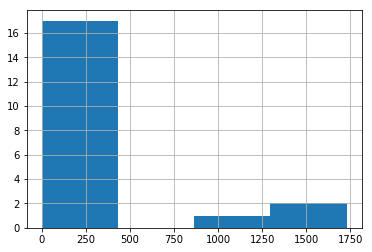

In [94]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
to_venues_Istanbul['total likes'].hist(bins=4)
plt.show()

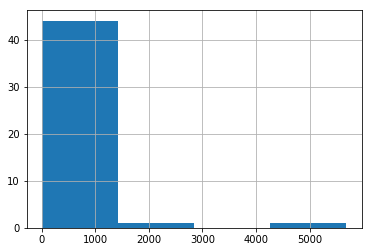

In [95]:
import matplotlib.pyplot as plt
to_venues_Izmir['total likes'].hist(bins=4)
plt.show()

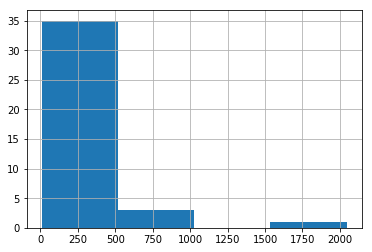

In [96]:
import matplotlib.pyplot as plt
to_venues_Antalya['total likes'].hist(bins=4)
plt.show()

In [97]:
import numpy as np
print(np.percentile(to_venues_Istanbul['total likes'], 25))
print(np.percentile(to_venues_Istanbul['total likes'], 50))
print(np.percentile(to_venues_Istanbul['total likes'], 75))

51.75
111.0
340.25


In [98]:
print(np.percentile(to_venues_Izmir['total likes'], 25))
print(np.percentile(to_venues_Izmir['total likes'], 50))
print(np.percentile(to_venues_Izmir['total likes'], 75))

51.5
158.0
306.25


In [99]:
print(np.percentile(to_venues_Antalya['total likes'], 25))
print(np.percentile(to_venues_Antalya['total likes'], 50))
print(np.percentile(to_venues_Antalya['total likes'], 75))

32.0
84.0
229.5


In [100]:
poor_Istanbul = to_venues_Istanbul['total likes']<=24
below_avg_Istanbul = to_venues_Istanbul[(to_venues_Istanbul['total likes']>24) & (to_venues_Istanbul['total likes']<=45)]
abv_avg_Istanbul = to_venues_Istanbul[(to_venues_Istanbul['total likes']>45) & (to_venues_Istanbul['total likes']<=76)]
great_Istanbul = to_venues_Istanbul['total likes']>76

In [101]:
poor_Izmir = to_venues_Izmir['total likes']<=24
below_avg_Izmir = to_venues_Izmir[(to_venues_Izmir['total likes']>24) & (to_venues_Izmir['total likes']<=45)]
abv_avg_Izmir = to_venues_Izmir[(to_venues_Izmir['total likes']>45) & (to_venues_Izmir['total likes']<=76)]
great_Izmir = to_venues_Izmir['total likes']>76

In [102]:
poor_Antalya = to_venues_Antalya['total likes']<=24
below_avg_Antalya = to_venues_Antalya[(to_venues_Antalya['total likes']>24) & (to_venues_Antalya['total likes']<=45)]
abv_avg_Antalya = to_venues_Antalya[(to_venues_Antalya['total likes']>45) & (to_venues_Antalya['total likes']<=76)]
great_Antalya = to_venues_Antalya['total likes']>76

In [103]:
def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'avg avg'
    if s['total likes']>76:
        return 'great'

to_venues_Istanbul['total likes_cat']=to_venues_Istanbul.apply(conditions, axis=1)
to_venues_Istanbul

,name,id,categories,lat,lng,total likes,total likes_cat
4,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947,32,below avg
10,Byulus Steakhouse&Burger,59bd56c92079551e2b7eb007,Steakhouse,41.071683,29.028886,53,avg avg
33,Match Cafe,4b5c7a03f964a520b03129e3,Restaurant,41.065213,28.995525,1537,great
34,Jaja Istanbul,5d8e0b5ba67bc000081c3e1d,Café,41.067860,29.001080,19,poor
43,Hümaliva Çikolata & Kahve,55bcf47d498e08d9c9742a5b,Chocolate Shop,41.053195,28.993723,1116,great
45,Mura,5b8ff55dc47cf9002c5f5ce7,Coffee Shop,41.050717,28.995441,64,avg avg
50,Taka Balık Ekmek,5055be06e4b055f81c4046cf,Seafood Restaurant,41.125881,29.071153,1728,great
51,You Cafe & Butik,57b87d84498e007ab9e73a9d,Bar,41.052900,28.992739,48,avg avg
64,Executive Lounge at Hilton İstanbul Bomonti,52d402c9498e9ed7f1bfa794,Snack Place,41.058397,28.979615,328,great
68,St. Regis Brasserie,55805fb3498ec74e36b44c08,French Restaurant,41.047530,28.992951,377,great


In [114]:
to_venues_Izmir['total likes_cat']=to_venues_Izmir.apply(conditions, axis=1)
to_venues_Izmir

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat
1,Yolo Art & Lounge,54a686c8498efd1a46618bb1,Café,38.418557,27.134476,856,restaurants,great
4,Sedir Aile Çay Bahçesi,4d809e2df724a093683011f7,Tea Room,38.421917,27.134007,225,restaurants,great
7,Komposto,53b410e4498e3a1b1776a905,Turkish Home Cooking Restaurant,38.421011,27.132062,374,restaurants,great
13,Zafer'in Yeri,5d9233b03b65980008da3af1,Seafood Restaurant,38.430744,27.135477,26,restaurants,below avg
14,Léone Patisserie & Boulangerie,4e89a0e67ee61bb7de0e6362,Pastry Shop,38.430041,27.141243,1091,restaurants,great
16,Chocco|art,57ef67a0498ee915d2815421,Chocolate Shop,38.432810,27.143453,75,restaurants,avg avg
17,Mild Chocolate,512ca019e4b06c0db4e9ac9e,Chocolate Shop,38.431046,27.141792,84,restaurants,great
20,Olive Meyhane,57bb3239498ea416181e1e5c,Meyhane,38.435588,27.141964,572,bars,great
23,Pizza Locale,55ffdde3498e58dc2381a311,Pizza Place,38.432516,27.142775,2333,restaurants,great
24,Equinox Restaurant,4dd7f8add1647fcf3e57fb59,American Restaurant,38.428241,27.135437,225,restaurants,great


In [115]:
to_venues_Antalya['total likes_cat']=to_venues_Antalya.apply(conditions, axis=1)
to_venues_Antalya

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat
0,Caffe Meet Kepez Sb,59c364498ad62e4277361478,Restaurant,36.916179,30.714956,45,restaurants,below avg
3,Özcanlar Kokoreç,54061e2c498ea2d8e5cc8a2b,Kokoreç Restaurant,36.913034,30.716971,133,restaurants,great
9,Ikea Restaurant & Cafe,5b1969b5e1f0aa002c2578f8,Cafeteria,36.914179,30.769677,267,restaurants,great
14,Simit Sarayı,5690c9f0498e604b3713eb19,Bagel Shop,36.905341,30.686571,24,restaurants,poor
16,Starbucks,58985116d7b473292553ab3b,Coffee Shop,36.910488,30.678620,281,restaurants,great
17,Ekincioğlu Restorant,5a534b621f74402cee7485e0,Restaurant,36.934607,30.680911,13,restaurants,poor
18,Happy Moon's,5b30e9468d0a53002ca30854,Restaurant,36.913910,30.770919,212,restaurants,great
28,Zirve TURK KAHVESI,59070a6e446ea609297a4490,Coffee Shop,36.886676,30.708640,43,restaurants,below avg
29,Şehr-i Künefe,566305ee498e723c4a1205f3,Dessert Shop,36.883498,30.714832,314,restaurants,great
30,Ba'BALIK Salaş,55b29235498e74c43c8d7b86,Seafood Restaurant,36.881012,30.739637,97,restaurants,great


In [116]:
to_venues_Istanbul['categories'].unique()

array(['Steakhouse', 'Restaurant', 'Café', 'Chocolate Shop',
       'Coffee Shop', 'Seafood Restaurant', 'Bar', 'Snack Place',
       'French Restaurant', 'Dessert Shop', 'Pizza Place', 'Hookah Bar',
       'Kebab Restaurant'], dtype=object)

In [117]:
to_venues_Izmir['categories'].unique()

array(['Café', 'Tea Room', 'Turkish Home Cooking Restaurant',
       'Seafood Restaurant', 'Pastry Shop', 'Chocolate Shop', 'Meyhane',
       'Pizza Place', 'American Restaurant', 'Candy Store',
       'Fish & Chips Shop', 'Ice Cream Shop', 'Fish Market',
       'Turkish Restaurant', 'BBQ Joint', 'Fast Food Restaurant',
       'Kebab Restaurant', 'Steakhouse', 'Manti Place', 'Hookah Bar',
       'Doner Restaurant', 'Sandwich Place', 'Restaurant', 'Cocktail Bar',
       'Coffee Shop'], dtype=object)

In [118]:
to_venues_Antalya['categories'].unique()

array(['Restaurant', 'Kokoreç Restaurant', 'Cafeteria', 'Bagel Shop',
       'Coffee Shop', 'Dessert Shop', 'Seafood Restaurant',
       'Turkish Restaurant', 'Hookah Bar', 'Bar', 'Snack Place',
       'Nightclub', 'Ice Cream Shop', 'Pizza Place', 'Café',
       'Italian Restaurant', 'Lounge', 'Cupcake Shop', 'Breakfast Spot'],
      dtype=object)

In [119]:
bars = ['Pub', 'Cocktail Bar', 'Bar', 'Dive Bar', 'Sports Bar','Hookah Bar','Meyhane','Nightclub','Lounge']
restaurants=['Steakhouse', 'Restaurant','Café','Coffee Shop','Seafood Restaurant','Snack Place', 'French Restaurant','Pizza Place','Kebab Restaurant','Turkish Home Cooking Restaurant','Tea Room','Pastry Shop',
       'Chocolate Shop','American Restaurant','Kokoreç Restaurant','Dessert Shop',
       'Candy Store', 'Fish & Chips Shop', 'Ice Cream Shop',
       'Fish Market', 'Turkish Restaurant', 'BBQ Joint','Cafeteria','Bagel Shop',
       'Fast Food Restaurant','Manti Place','Doner Restaurant', 'Sandwich Place','Italian Restaurant','Cupcake Shop', 'Breakfast Spot',]

def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in restaurants:
        return 'restaurants'

to_venues_Istanbul['categories_new']=to_venues_Istanbul.apply(conditions2, axis=1)

In [120]:
to_venues_Istanbul

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
4,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947,32,below avg,restaurants
10,Byulus Steakhouse&Burger,59bd56c92079551e2b7eb007,Steakhouse,41.071683,29.028886,53,avg avg,restaurants
33,Match Cafe,4b5c7a03f964a520b03129e3,Restaurant,41.065213,28.995525,1537,great,restaurants
34,Jaja Istanbul,5d8e0b5ba67bc000081c3e1d,Café,41.067860,29.001080,19,poor,restaurants
43,Hümaliva Çikolata & Kahve,55bcf47d498e08d9c9742a5b,Chocolate Shop,41.053195,28.993723,1116,great,restaurants
45,Mura,5b8ff55dc47cf9002c5f5ce7,Coffee Shop,41.050717,28.995441,64,avg avg,restaurants
50,Taka Balık Ekmek,5055be06e4b055f81c4046cf,Seafood Restaurant,41.125881,29.071153,1728,great,restaurants
51,You Cafe & Butik,57b87d84498e007ab9e73a9d,Bar,41.052900,28.992739,48,avg avg,bars
64,Executive Lounge at Hilton İstanbul Bomonti,52d402c9498e9ed7f1bfa794,Snack Place,41.058397,28.979615,328,great,restaurants
68,St. Regis Brasserie,55805fb3498ec74e36b44c08,French Restaurant,41.047530,28.992951,377,great,restaurants


In [121]:
to_venues_Izmir['categories_new']=to_venues_Izmir.apply(conditions2, axis=1)
to_venues_Izmir

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat
1,Yolo Art & Lounge,54a686c8498efd1a46618bb1,Café,38.418557,27.134476,856,restaurants,great
4,Sedir Aile Çay Bahçesi,4d809e2df724a093683011f7,Tea Room,38.421917,27.134007,225,restaurants,great
7,Komposto,53b410e4498e3a1b1776a905,Turkish Home Cooking Restaurant,38.421011,27.132062,374,restaurants,great
13,Zafer'in Yeri,5d9233b03b65980008da3af1,Seafood Restaurant,38.430744,27.135477,26,restaurants,below avg
14,Léone Patisserie & Boulangerie,4e89a0e67ee61bb7de0e6362,Pastry Shop,38.430041,27.141243,1091,restaurants,great
16,Chocco|art,57ef67a0498ee915d2815421,Chocolate Shop,38.432810,27.143453,75,restaurants,avg avg
17,Mild Chocolate,512ca019e4b06c0db4e9ac9e,Chocolate Shop,38.431046,27.141792,84,restaurants,great
20,Olive Meyhane,57bb3239498ea416181e1e5c,Meyhane,38.435588,27.141964,572,bars,great
23,Pizza Locale,55ffdde3498e58dc2381a311,Pizza Place,38.432516,27.142775,2333,restaurants,great
24,Equinox Restaurant,4dd7f8add1647fcf3e57fb59,American Restaurant,38.428241,27.135437,225,restaurants,great


In [122]:
to_venues_Antalya['categories_new']=to_venues_Antalya.apply(conditions2, axis=1)
to_venues_Antalya

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat
0,Caffe Meet Kepez Sb,59c364498ad62e4277361478,Restaurant,36.916179,30.714956,45,restaurants,below avg
3,Özcanlar Kokoreç,54061e2c498ea2d8e5cc8a2b,Kokoreç Restaurant,36.913034,30.716971,133,restaurants,great
9,Ikea Restaurant & Cafe,5b1969b5e1f0aa002c2578f8,Cafeteria,36.914179,30.769677,267,restaurants,great
14,Simit Sarayı,5690c9f0498e604b3713eb19,Bagel Shop,36.905341,30.686571,24,restaurants,poor
16,Starbucks,58985116d7b473292553ab3b,Coffee Shop,36.910488,30.678620,281,restaurants,great
17,Ekincioğlu Restorant,5a534b621f74402cee7485e0,Restaurant,36.934607,30.680911,13,restaurants,poor
18,Happy Moon's,5b30e9468d0a53002ca30854,Restaurant,36.913910,30.770919,212,restaurants,great
28,Zirve TURK KAHVESI,59070a6e446ea609297a4490,Coffee Shop,36.886676,30.708640,43,restaurants,below avg
29,Şehr-i Künefe,566305ee498e723c4a1205f3,Dessert Shop,36.883498,30.714832,314,restaurants,great
30,Ba'BALIK Salaş,55b29235498e74c43c8d7b86,Seafood Restaurant,36.881012,30.739637,97,restaurants,great


In [123]:
to_onehot_Istanbul = pd.get_dummies(to_venues_Istanbul[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot_Istanbul['Name'] = to_venues_Istanbul['name'] 

# move neighborhood column to the first column
fixed_columns_Istanbul = [to_onehot_Istanbul.columns[-1]] + list(to_onehot_Istanbul.columns[:-1])
to_onehot_Istanbul = to_onehot_Istanbul[fixed_columns_Istanbul]

to_onehot_Istanbul.head()

,Name,bars,restaurants,avg avg,below avg,great,poor
4,Etiler Gurme Kasabı & Izgara,0,1,0,1,0,0
10,Byulus Steakhouse&Burger,0,1,1,0,0,0
33,Match Cafe,0,1,0,0,1,0
34,Jaja Istanbul,0,1,0,0,0,1
43,Hümaliva Çikolata & Kahve,0,1,0,0,1,0


In [124]:
to_onehot_Izmir= pd.get_dummies(to_venues_Izmir[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot_Izmir['Name'] = to_venues_Izmir['name'] 

# move neighborhood column to the first column
fixed_columns_Izmir = [to_onehot_Izmir.columns[-1]] + list(to_onehot_Izmir.columns[:-1])
to_onehot_Izmir = to_onehot_Izmir[fixed_columns_Izmir]

to_onehot_Izmir.head()

,Name,bars,restaurants,avg avg,below avg,great,poor
1,Yolo Art & Lounge,0,1,0,0,1,0
4,Sedir Aile Çay Bahçesi,0,1,0,0,1,0
7,Komposto,0,1,0,0,1,0
13,Zafer'in Yeri,0,1,0,1,0,0
14,Léone Patisserie & Boulangerie,0,1,0,0,1,0


In [125]:
to_onehot_Antalya= pd.get_dummies(to_venues_Antalya[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot_Antalya['Name'] = to_venues_Antalya['name'] 

# move neighborhood column to the first column
fixed_columns_Antalya = [to_onehot_Antalya.columns[-1]] + list(to_onehot_Antalya.columns[:-1])
to_onehot_Antalya = to_onehot_Antalya[fixed_columns_Antalya]

to_onehot_Antalya.head()

,Name,bars,restaurants,avg avg,below avg,great,poor
0,Caffe Meet Kepez Sb,0,1,0,1,0,0
3,Özcanlar Kokoreç,0,1,0,0,1,0
9,Ikea Restaurant & Cafe,0,1,0,0,1,0
14,Simit Sarayı,0,1,0,0,0,1
16,Starbucks,0,1,0,0,1,0


In [126]:
cluster_df_Istanbul = to_onehot_Istanbul.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans_Istanbul = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df_Istanbul)

# check cluster labels generated for each row in the dataframe
kmeans_Istanbul.labels_[0:10]

array([2, 0, 1, 3, 1, 0, 1, 0, 1, 1], dtype=int32)

In [127]:
to_venues_Istanbul['label'] = kmeans_Istanbul.labels_
to_venues_Istanbul.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
4,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947,32,below avg,restaurants,2
10,Byulus Steakhouse&Burger,59bd56c92079551e2b7eb007,Steakhouse,41.071683,29.028886,53,avg avg,restaurants,0
33,Match Cafe,4b5c7a03f964a520b03129e3,Restaurant,41.065213,28.995525,1537,great,restaurants,1
34,Jaja Istanbul,5d8e0b5ba67bc000081c3e1d,Café,41.067860,29.001080,19,poor,restaurants,3
43,Hümaliva Çikolata & Kahve,55bcf47d498e08d9c9742a5b,Chocolate Shop,41.053195,28.993723,1116,great,restaurants,1


In [128]:
map_clusters_Istanbul = folium.Map(location=[latitude_Istanbul, longitude_Istanbul], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_venues_Istanbul['lat'], to_venues_Istanbul['lng'], to_venues_Istanbul['name'], to_venues_Istanbul['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Istanbul)
       
map_clusters_Istanbul

In [130]:
cluster_df_Izmir = to_onehot_Izmir.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans_Izmir = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df_Izmir)

# check cluster labels generated for each row in the dataframe
kmeans_Izmir.labels_[0:10]
to_venues_Izmir['label'] = kmeans_Izmir.labels_
to_venues_Izmir.head()

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
1,Yolo Art & Lounge,54a686c8498efd1a46618bb1,Café,38.418557,27.134476,856,restaurants,great,0
4,Sedir Aile Çay Bahçesi,4d809e2df724a093683011f7,Tea Room,38.421917,27.134007,225,restaurants,great,0
7,Komposto,53b410e4498e3a1b1776a905,Turkish Home Cooking Restaurant,38.421011,27.132062,374,restaurants,great,0
13,Zafer'in Yeri,5d9233b03b65980008da3af1,Seafood Restaurant,38.430744,27.135477,26,restaurants,below avg,2
14,Léone Patisserie & Boulangerie,4e89a0e67ee61bb7de0e6362,Pastry Shop,38.430041,27.141243,1091,restaurants,great,0


In [131]:
map_clusters_Izmir = folium.Map(location=[latitude_Izmir, longitude_Izmir], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_venues_Izmir['lat'], to_venues_Izmir['lng'], to_venues_Izmir['name'], to_venues_Izmir['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Izmir)
       
map_clusters_Izmir

In [132]:
cluster_df_Antalya = to_onehot_Antalya.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans_Antalya = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df_Antalya)

# check cluster labels generated for each row in the dataframe
kmeans_Antalya.labels_[0:10]
to_venues_Antalya['label'] = kmeans_Antalya.labels_
to_venues_Antalya.head()

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
0,Caffe Meet Kepez Sb,59c364498ad62e4277361478,Restaurant,36.916179,30.714956,45,restaurants,below avg,2
3,Özcanlar Kokoreç,54061e2c498ea2d8e5cc8a2b,Kokoreç Restaurant,36.913034,30.716971,133,restaurants,great,1
9,Ikea Restaurant & Cafe,5b1969b5e1f0aa002c2578f8,Cafeteria,36.914179,30.769677,267,restaurants,great,1
14,Simit Sarayı,5690c9f0498e604b3713eb19,Bagel Shop,36.905341,30.686571,24,restaurants,poor,3
16,Starbucks,58985116d7b473292553ab3b,Coffee Shop,36.910488,30.678620,281,restaurants,great,1


In [133]:
map_clusters_Antalya = folium.Map(location=[latitude_Antalya, longitude_Antalya], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_venues_Antalya['lat'], to_venues_Antalya['lng'], to_venues_Antalya['name'], to_venues_Antalya['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_Antalya)
       
map_clusters_Antalya

In [137]:
to_venues_Istanbul.loc[to_venues_Istanbul['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
10,Byulus Steakhouse&Burger,59bd56c92079551e2b7eb007,Steakhouse,41.071683,29.028886,53,avg avg,restaurants,0
45,Mura,5b8ff55dc47cf9002c5f5ce7,Coffee Shop,41.050717,28.995441,64,avg avg,restaurants,0
51,You Cafe & Butik,57b87d84498e007ab9e73a9d,Bar,41.052900,28.992739,48,avg avg,bars,0


In [138]:
to_venues_Istanbul.loc[to_venues_Istanbul['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
33,Match Cafe,4b5c7a03f964a520b03129e3,Restaurant,41.065213,28.995525,1537,great,restaurants,1
43,Hümaliva Çikolata & Kahve,55bcf47d498e08d9c9742a5b,Chocolate Shop,41.053195,28.993723,1116,great,restaurants,1
50,Taka Balık Ekmek,5055be06e4b055f81c4046cf,Seafood Restaurant,41.125881,29.071153,1728,great,restaurants,1
64,Executive Lounge at Hilton İstanbul Bomonti,52d402c9498e9ed7f1bfa794,Snack Place,41.058397,28.979615,328,great,restaurants,1
68,St. Regis Brasserie,55805fb3498ec74e36b44c08,French Restaurant,41.047530,28.992951,377,great,restaurants,1
71,Muazzam Künefe,5d715c6dd9d8ac0008486c4b,Dessert Shop,41.025216,29.011385,106,great,restaurants,1
72,Zucca Pizza,586f6d9dac32914c79a0d919,Pizza Place,41.050105,28.985408,173,great,restaurants,1
74,Ab-ı Hayat Tasavvuf Kahvesi,56a1007f498ec8582a41809e,Coffee Shop,41.026627,29.091189,119,great,restaurants,1
75,Tebessüm Kahvesi,56ebe2d6498ef04873d211a4,Café,41.016682,29.038983,275,great,restaurants,1
86,Balık Dükkanı,57cd9d55498e98eef0859681,Seafood Restaurant,41.003200,29.074246,96,great,restaurants,1


In [139]:
to_venues_Istanbul.loc[to_venues_Istanbul['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
4,Etiler Gurme Kasabı & Izgara,59dfb5c186bc495799852e2c,Steakhouse,41.079847,29.044947,32,below avg,restaurants,2
99,Yanık Köşk Restaurant,5cd9b005065ef5002cd77d31,Kebab Restaurant,41.020071,28.963601,35,below avg,restaurants,2


In [140]:
to_venues_Istanbul.loc[to_venues_Istanbul['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
34,Jaja Istanbul,5d8e0b5ba67bc000081c3e1d,Café,41.067860,29.001080,19,poor,restaurants,3
81,Kibrit Lounge,5dda62b3c515cc00085caa7d,Café,41.021849,29.109936,1,poor,restaurants,3


In [141]:
to_venues_Izmir.loc[to_venues_Izmir['label']==0]

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
1,Yolo Art & Lounge,54a686c8498efd1a46618bb1,Café,38.418557,27.134476,856,restaurants,great,0
4,Sedir Aile Çay Bahçesi,4d809e2df724a093683011f7,Tea Room,38.421917,27.134007,225,restaurants,great,0
7,Komposto,53b410e4498e3a1b1776a905,Turkish Home Cooking Restaurant,38.421011,27.132062,374,restaurants,great,0
14,Léone Patisserie & Boulangerie,4e89a0e67ee61bb7de0e6362,Pastry Shop,38.430041,27.141243,1091,restaurants,great,0
17,Mild Chocolate,512ca019e4b06c0db4e9ac9e,Chocolate Shop,38.431046,27.141792,84,restaurants,great,0
23,Pizza Locale,55ffdde3498e58dc2381a311,Pizza Place,38.432516,27.142775,2333,restaurants,great,0
24,Equinox Restaurant,4dd7f8add1647fcf3e57fb59,American Restaurant,38.428241,27.135437,225,restaurants,great,0
26,Reyhan Pastanesi,4b45f221f964a520ad1226e3,Pastry Shop,38.432342,27.141375,5686,restaurants,great,0
37,Yakari Cafe & Sandwich,5b1316bb1953f3002c603960,Café,38.399563,27.128982,18,restaurants,poor,0
38,Münire,556c5f69498e6e52f7189159,Café,38.437239,27.144275,1005,restaurants,great,0


In [142]:
to_venues_Izmir.loc[to_venues_Izmir['label']==1]

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
20,Olive Meyhane,57bb3239498ea416181e1e5c,Meyhane,38.435588,27.141964,572,bars,great,1
56,Samko'nun Yeri,55204b22498e2963d9f81060,Meyhane,38.433275,27.181503,132,bars,great,1
78,Koyu Meyhane,5a535a1758aa7f12603b09a4,Meyhane,38.453000,27.176752,142,bars,great,1
80,Black Rocca Coffee&Lounge,5a8c04331543c734d208646d,Hookah Bar,38.429770,27.201415,44,bars,below avg,1
85,Keyf-i Neyzen,5ac4de8b3d47911cdd30e3dc,Meyhane,38.450364,27.185105,142,bars,great,1
93,Studio House,5d4306e107f7680008ebaca2,Cocktail Bar,38.451001,27.201151,276,bars,great,1


In [143]:
to_venues_Izmir.loc[to_venues_Izmir['label']==2]

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
13,Zafer'in Yeri,5d9233b03b65980008da3af1,Seafood Restaurant,38.430744,27.135477,26,restaurants,below avg,2
50,Özbek Balıkçılık,510ce975e4b0754695af4a92,Fish Market,38.406058,27.114312,29,restaurants,below avg,2
59,Paşa Döner,517655f0e4b0d22e511f47aa,Turkish Restaurant,38.389391,27.176526,43,restaurants,below avg,2
67,Ziyade Et,5df758c046858900071f3047,Steakhouse,38.452407,27.178688,45,restaurants,below avg,2
84,Ali Baba'nın Yeri,52ebf9fd498ed6d471379bbd,Sandwich Place,38.439620,27.195235,31,restaurants,below avg,2


In [144]:
to_venues_Izmir.loc[to_venues_Izmir['label']==3]

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
16,Chocco|art,57ef67a0498ee915d2815421,Chocolate Shop,38.432810,27.143453,75,restaurants,avg avg,3
44,Sos Fish,5922b2d74c954c04e9cf55ca,Fish & Chips Shop,38.426859,27.170076,47,restaurants,avg avg,3
61,Charleston Cake & More,593571f04aa3f87d7ca26169,Café,38.401894,27.095049,76,restaurants,avg avg,3
68,Ödemiş Köftecisi,50a0f670e4b0cfcd3b7e0829,Turkish Restaurant,38.425479,27.196460,49,restaurants,avg avg,3
91,Tost Art Yeni Nesil Tost & Cafe,5be726e63149b9002cdcd764,Sandwich Place,38.459529,27.101823,59,restaurants,avg avg,3


In [145]:
to_venues_Antalya.loc[to_venues_Antalya['label']==0]

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
33,Köyüm Nargile Cafe,583c145318384c4177d560c5,Hookah Bar,36.878348,30.710190,107,bars,great,0
35,The Queen Pub,5c66f427b3d8e2002c542985,Bar,36.884237,30.705058,37,bars,below avg,0
38,Dark Angel Club,5bb903c52632ec002c39f16b,Nightclub,36.885448,30.708018,30,bars,below avg,0
39,Üç kapılar,582755c210a3441bad36f276,Nightclub,36.887808,30.705349,17,bars,poor,0
68,Köyüm Kültür,5da31d797131020008eb8812,Hookah Bar,36.902348,30.656761,22,bars,poor,0
76,Akra Barut Lobby Lounge,55ca3bb5498e35bfece3a2db,Lounge,36.864004,30.725856,39,bars,below avg,0


In [146]:
to_venues_Antalya.loc[to_venues_Antalya['label']==1]

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
3,Özcanlar Kokoreç,54061e2c498ea2d8e5cc8a2b,Kokoreç Restaurant,36.913034,30.716971,133,restaurants,great,1
9,Ikea Restaurant & Cafe,5b1969b5e1f0aa002c2578f8,Cafeteria,36.914179,30.769677,267,restaurants,great,1
16,Starbucks,58985116d7b473292553ab3b,Coffee Shop,36.910488,30.678620,281,restaurants,great,1
18,Happy Moon's,5b30e9468d0a53002ca30854,Restaurant,36.913910,30.770919,212,restaurants,great,1
29,Şehr-i Künefe,566305ee498e723c4a1205f3,Dessert Shop,36.883498,30.714832,314,restaurants,great,1
30,Ba'BALIK Salaş,55b29235498e74c43c8d7b86,Seafood Restaurant,36.881012,30.739637,97,restaurants,great,1
32,Piyazcı Hüseyin,4f649972e4b0aa8f672ccb6c,Turkish Restaurant,36.895441,30.685281,263,restaurants,great,1
34,Keyf-i Hisar Restaurant,5220c3a611d231a05f309920,Restaurant,36.895879,30.690844,114,restaurants,great,1
37,Tostcu Arif Usta,5230224e11d2959c98cb5c93,Snack Place,36.878446,30.736555,76,restaurants,avg avg,1
43,Bella Gelateria,5a6edc5af1fdaf2a3c1701d4,Ice Cream Shop,36.880467,30.708697,84,restaurants,great,1


In [147]:
to_venues_Antalya.loc[to_venues_Antalya['label']==2]

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
0,Caffe Meet Kepez Sb,59c364498ad62e4277361478,Restaurant,36.916179,30.714956,45,restaurants,below avg,2
28,Zirve TURK KAHVESI,59070a6e446ea609297a4490,Coffee Shop,36.886676,30.708640,43,restaurants,below avg,2
36,Kalamar Balıkevi,510e8cbbe4b0470c64a78229,Seafood Restaurant,36.886573,30.713320,27,restaurants,below avg,2
72,Locca Co.,5d7a48e7ab6cc5000891a04e,Café,36.902892,30.656512,45,restaurants,below avg,2
75,By Marrakech Cafe,5c9f448ffb8e59002cb9326b,Café,36.902766,30.658500,34,restaurants,below avg,2
84,Cozy Coffee Art House,5bfc16c6eaf49a002c165268,Coffee Shop,36.868426,30.719774,40,restaurants,below avg,2
93,The Beaver Coffee Shop,5af43a22ff03060039535e83,Coffee Shop,36.900627,30.657169,30,restaurants,below avg,2


In [148]:
to_venues_Antalya.loc[to_venues_Antalya['label']==3]

,name,id,categories,lat,lng,total likes,categories_new,total likes_cat,label
14,Simit Sarayı,5690c9f0498e604b3713eb19,Bagel Shop,36.905341,30.686571,24,restaurants,poor,3
17,Ekincioğlu Restorant,5a534b621f74402cee7485e0,Restaurant,36.934607,30.680911,13,restaurants,poor,3
44,MOKKA CAFE BAYINDIR,5c59d76b396de0002cbef387,Cafeteria,36.902846,30.678217,20,restaurants,poor,3
58,Antepia,57b5e430498e35408c5f6db4,Dessert Shop,36.884006,30.711174,12,restaurants,poor,3
69,Mama Maria's 🍕,599ab7b109e2837b2fc1f8d4,Pizza Place,36.908069,30.659147,15,restaurants,poor,3
